In [1]:
library(lubridate, warn.conflicts = FALSE)

### Exercise 1

In [2]:
df <- read.csv("Global_Mobility_Report.csv")
head(df)

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,,,,,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1


In [3]:
#observable names
obs_names <- c('retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline',
               'parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline',
               'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

week.analysis <- function(x){
    #filtering df
    dff <- df[which(df$country_region%in%x & df$sub_region_1%in%''),] 
    #adding week, month and year column
    dff$week <- week(dff$date)
    dff$month <- month(dff$date)
    dff$year <- year(dff$date)
    dff$week_count <- dff$week + (dff$year - 2020)*52 #differentiating weeks over years
    dff$month_count <- dff$month + (dff$year - 2020)*12 #differentiating months over years
    
    
    nObs <- 10:15 #dataframe's indexes of observables
    for (j in nObs){
        values <- c(0)
        for (i in unique(dff$week_count)){
            m <- mean(dff[which(dff$week_count%in%i),j])
            values <- append(values,m)
        }
        
        plot(unique(dff$week_count),values[-1], type='l',
            main=c(x, obs_names[j-9]),
             xlab='weeks', ylab='means by week') #[-1] to remove the 1st implementing '0' value
    }
    
}

month.analysis <- function(x){
    #filtering df
    dff <- df[which(df$country_region%in%x & df$sub_region_1%in%''),] 
    #adding week, month and year column
    dff$week <- week(dff$date)
    dff$month <- month(dff$date)
    dff$year <- year(dff$date)
    dff$week_count <- dff$week + (dff$year - 2020)*52 #differentiating weeks over years
    dff$month_count <- dff$month + (dff$year - 2020)*12 #differentiating months over years
    
    nObs <- 10:15 #dataframe's indexes of observables
    for (j in nObs){
        values <- c(0)
        for (i in unique(dff$month_count)){
            m <- mean(dff[which(dff$month_count%in%i),j])
            values <- append(values,m)
        }
        
        plot(unique(dff$month_count),values[-1], type='l',
            main=c(x, obs_names[j-9]),
             xlab='months', ylab='means by month') #[-1] to remove the 1st implementing '0' value
    }
    
}

#!! togliere commenti

Analysis for Slovakia

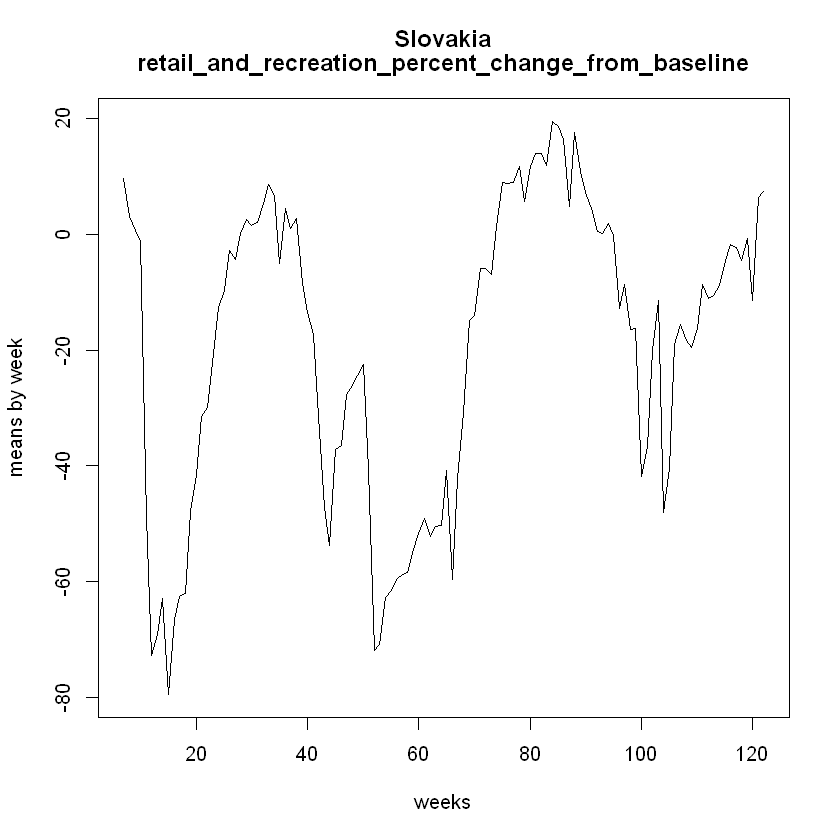

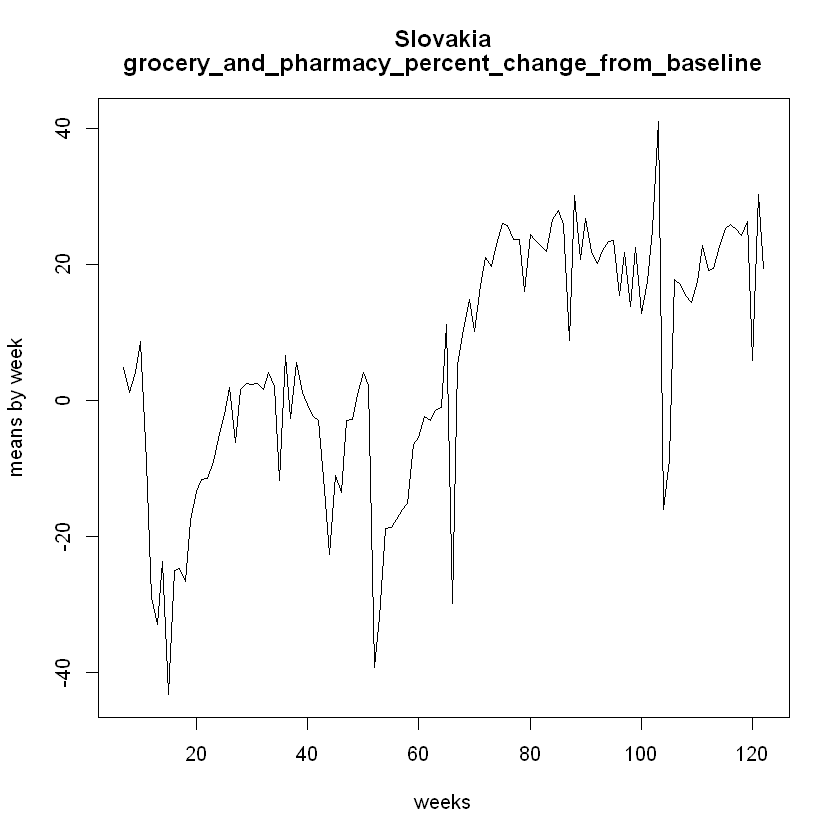

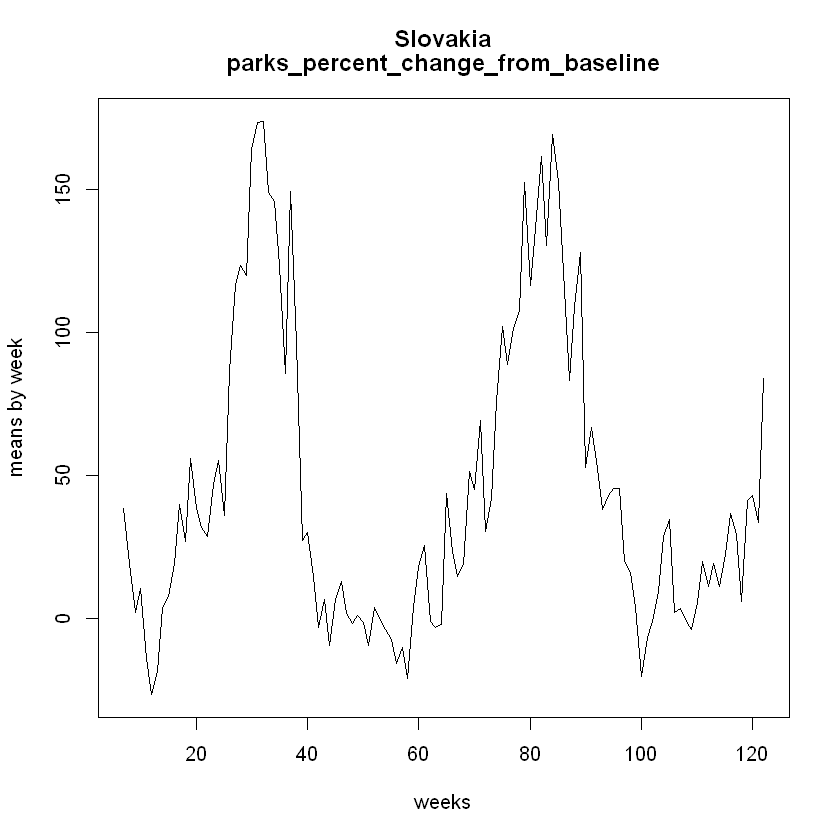

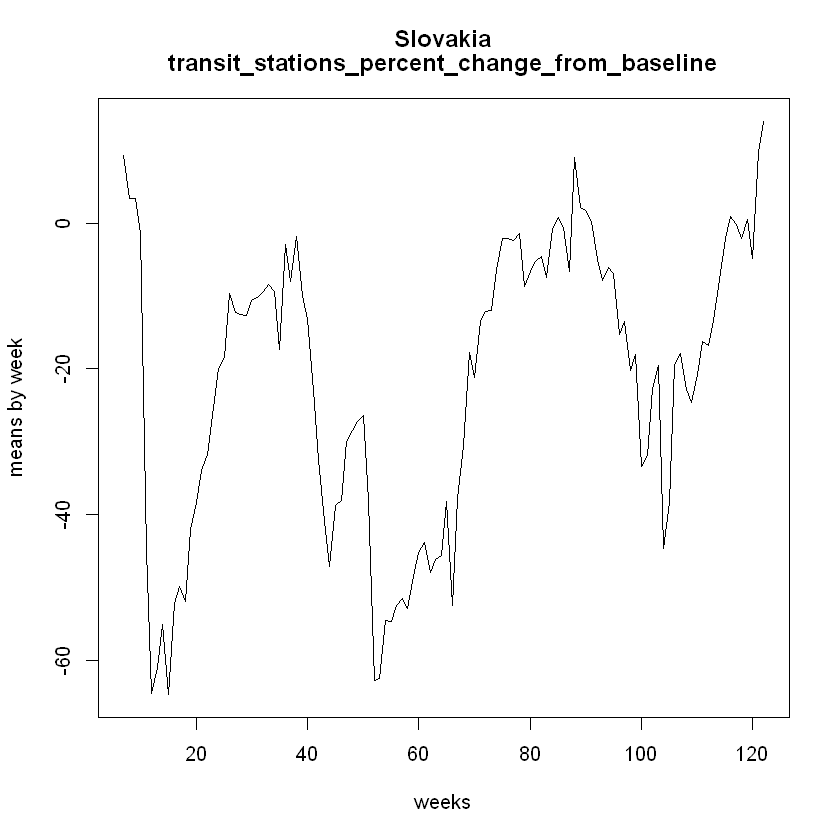

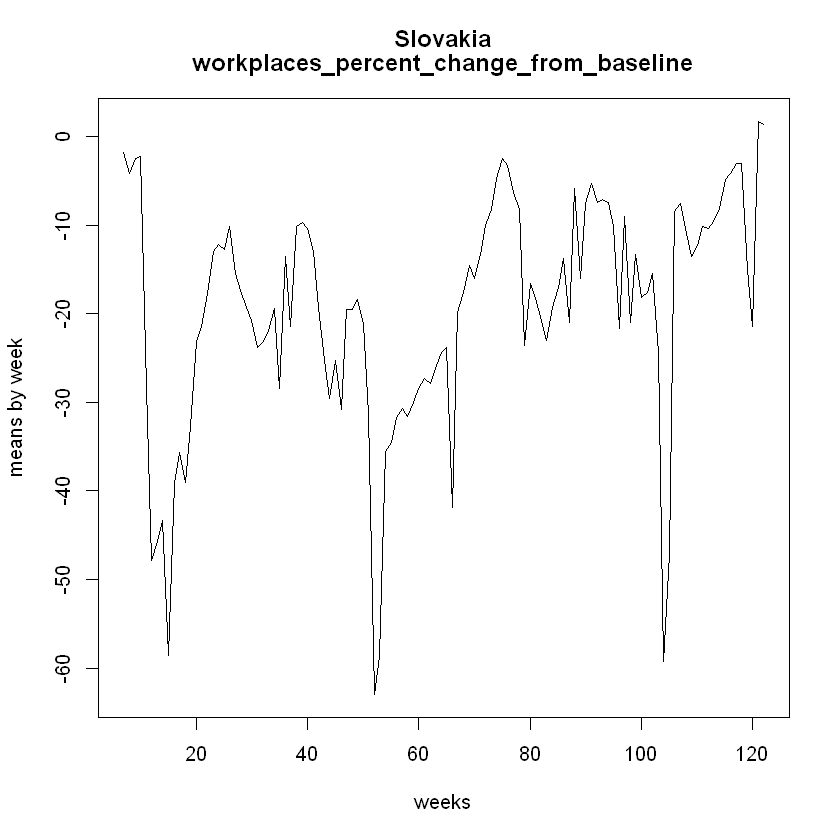

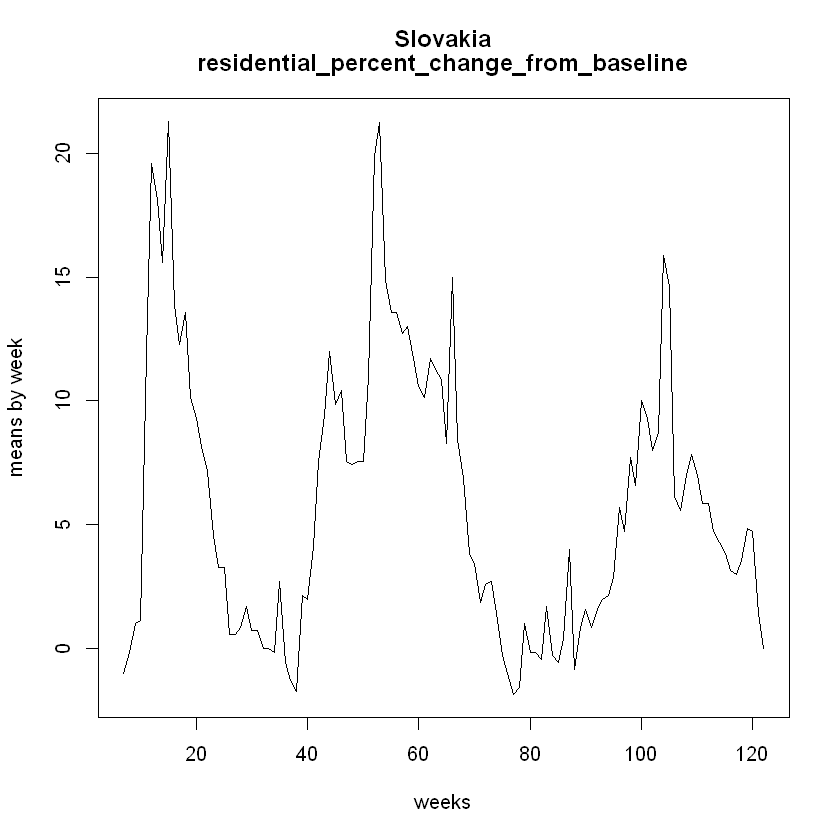

In [4]:
week.analysis('Slovakia')

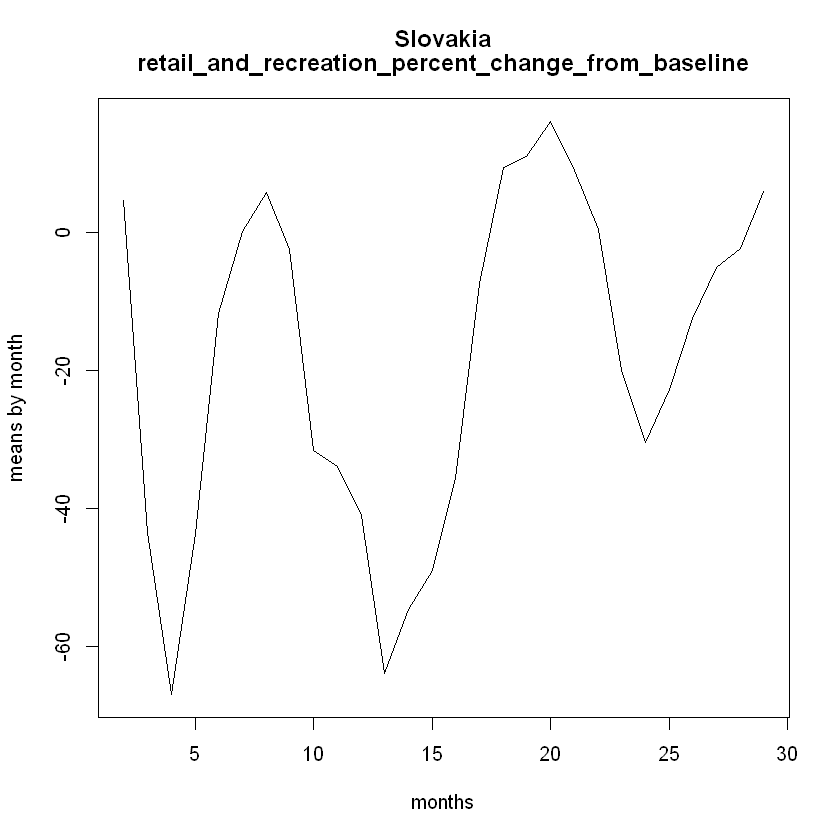

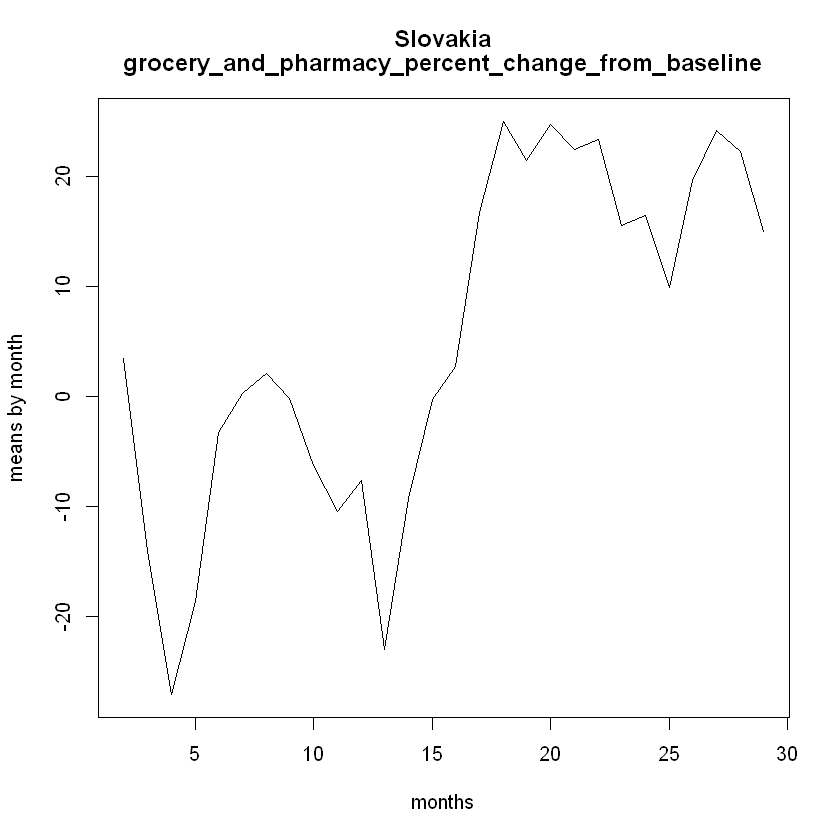

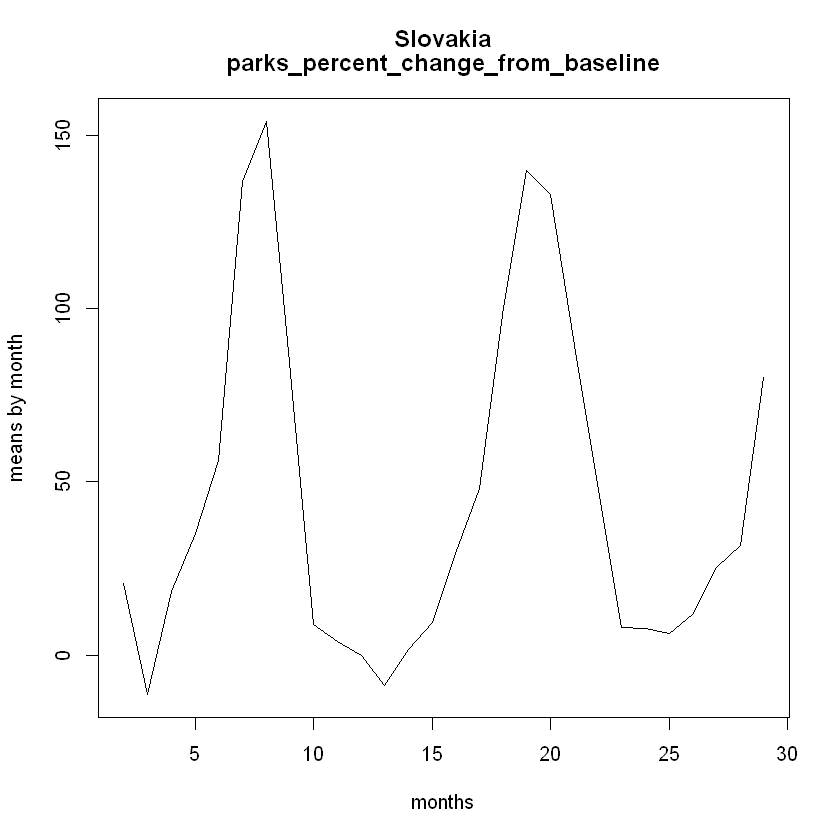

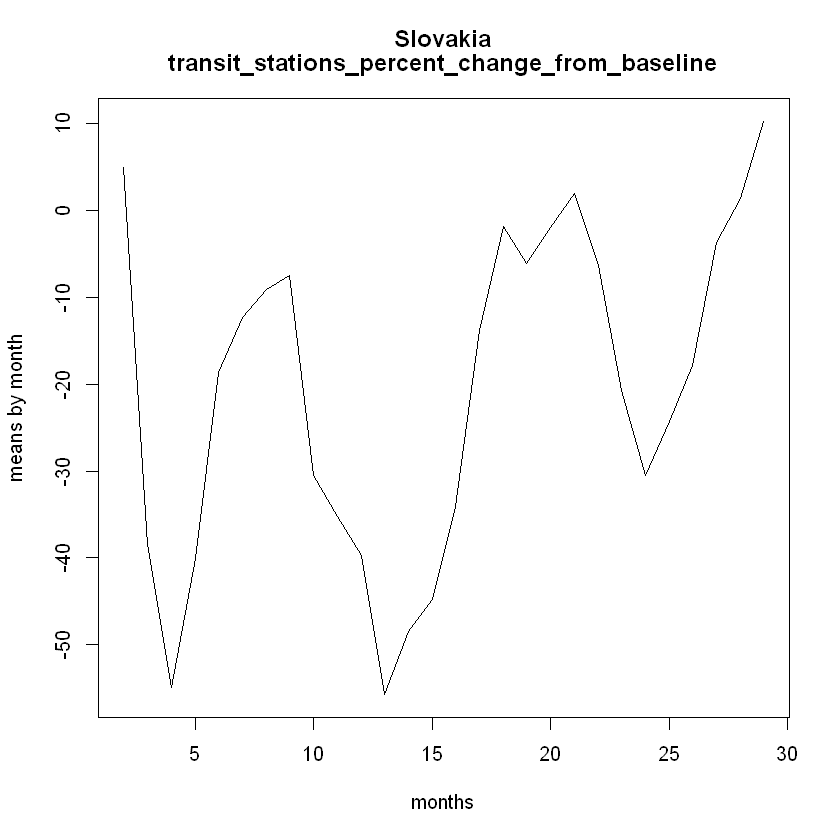

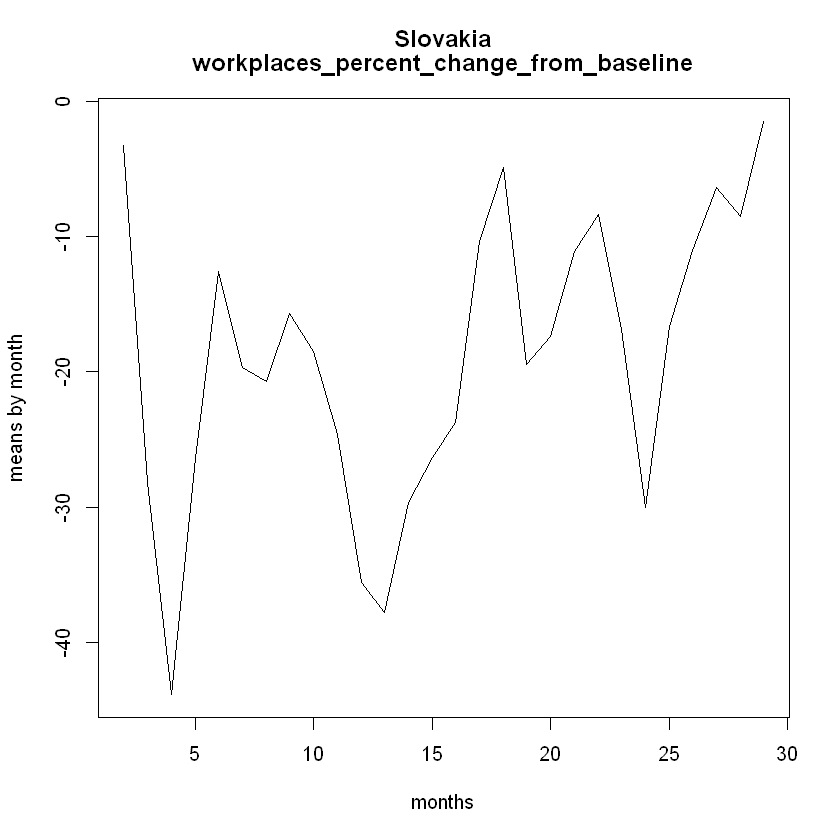

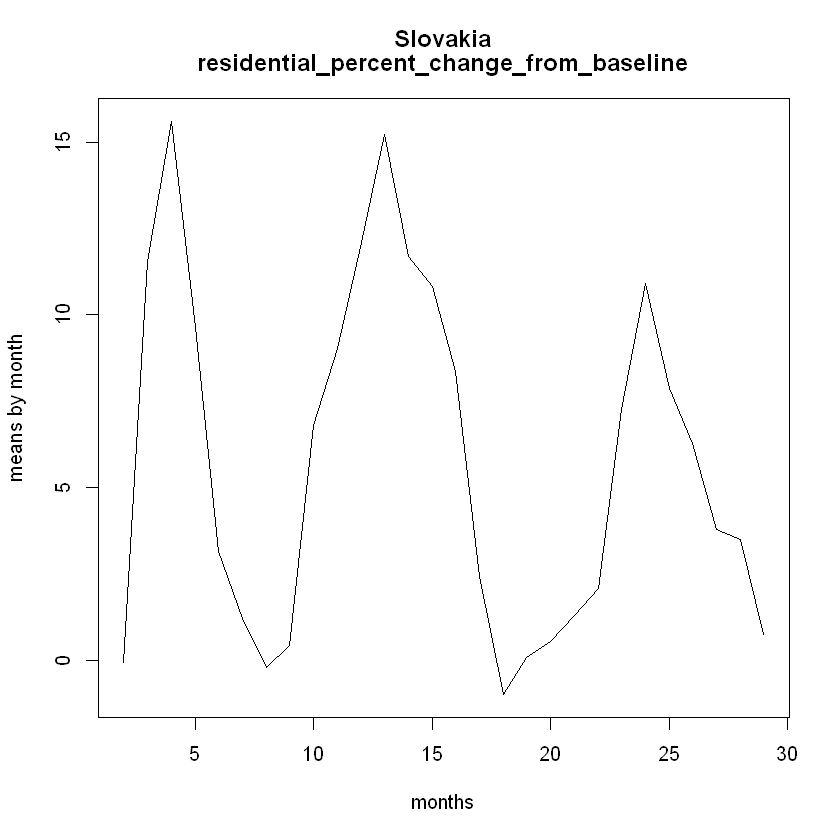

In [5]:
month.analysis('Slovakia')

Analysis for 'Romania'

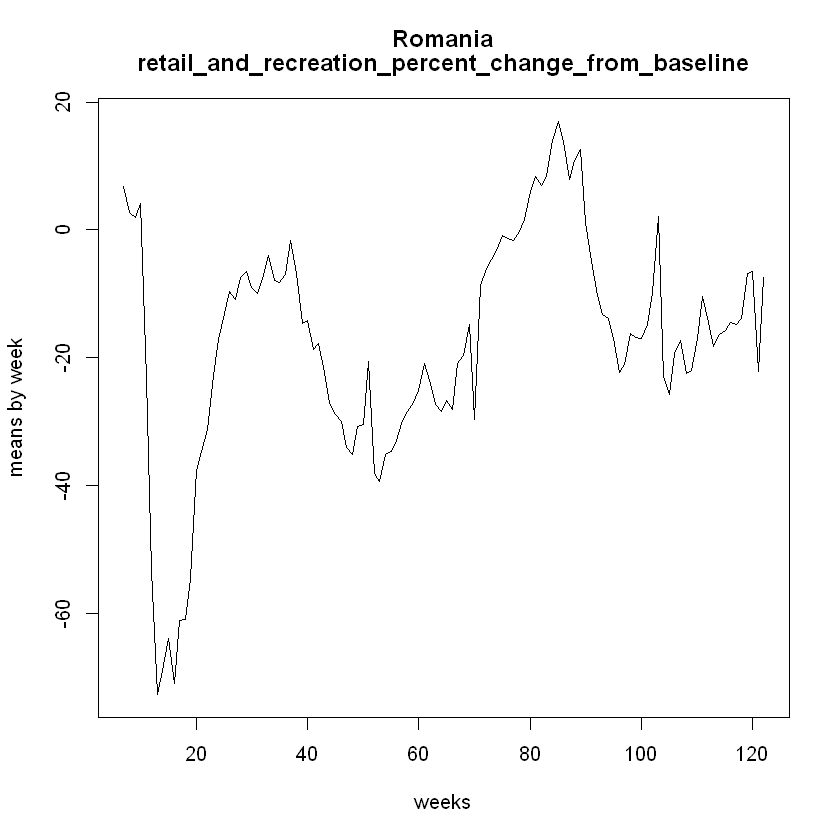

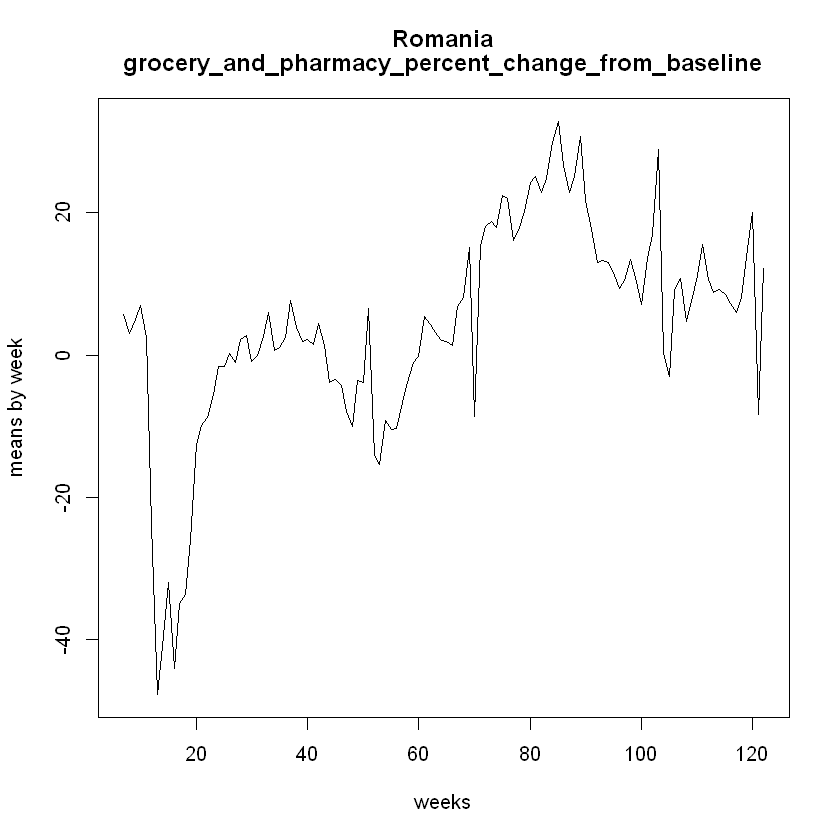

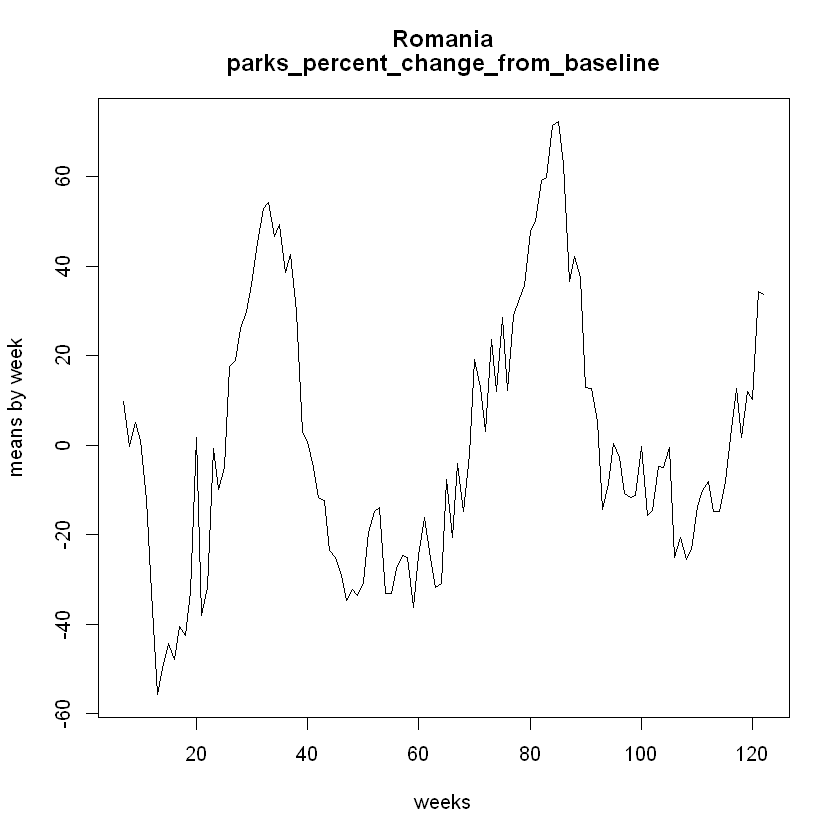

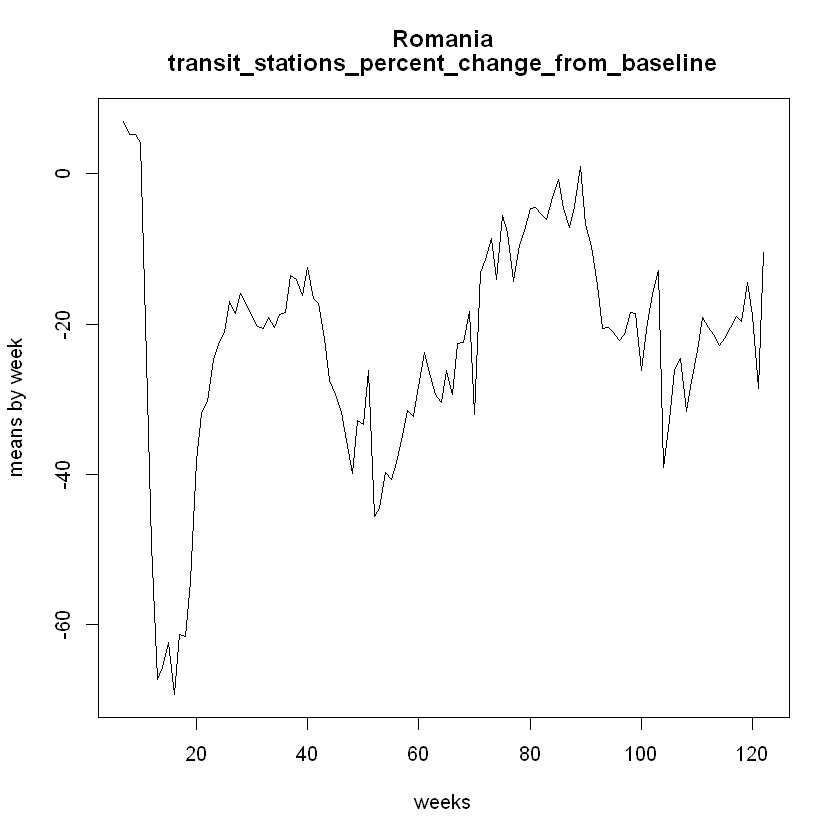

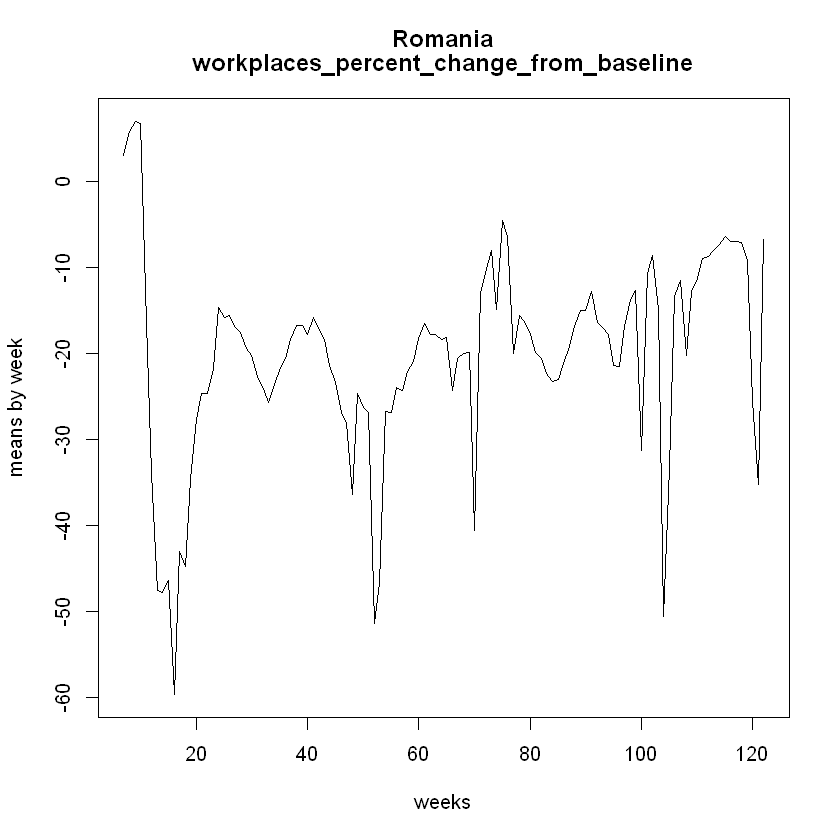

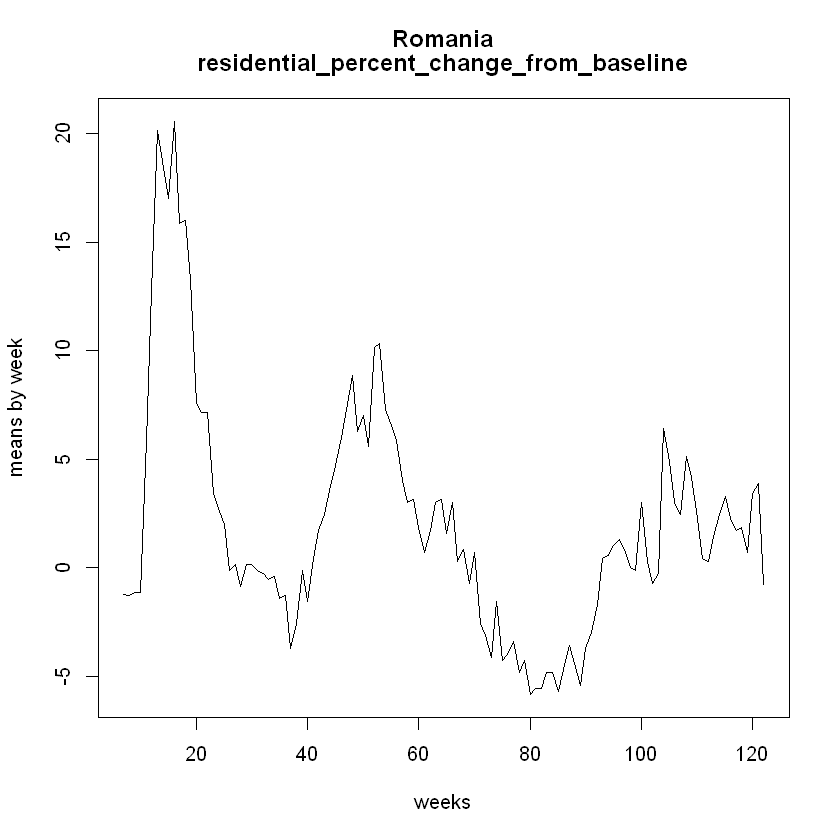

In [82]:
week.analysis('Romania')

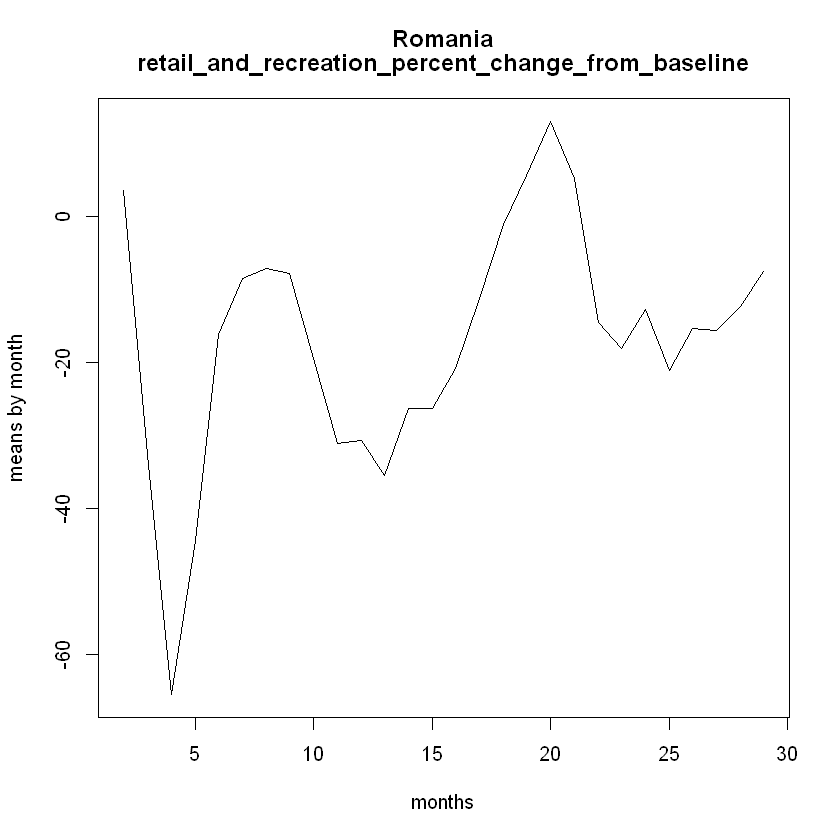

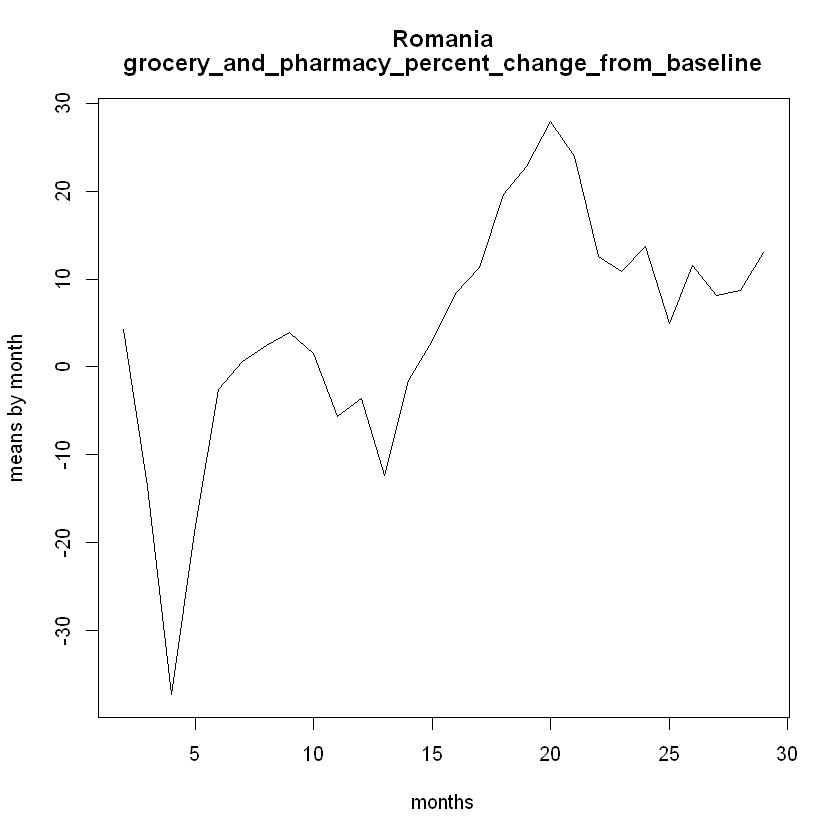

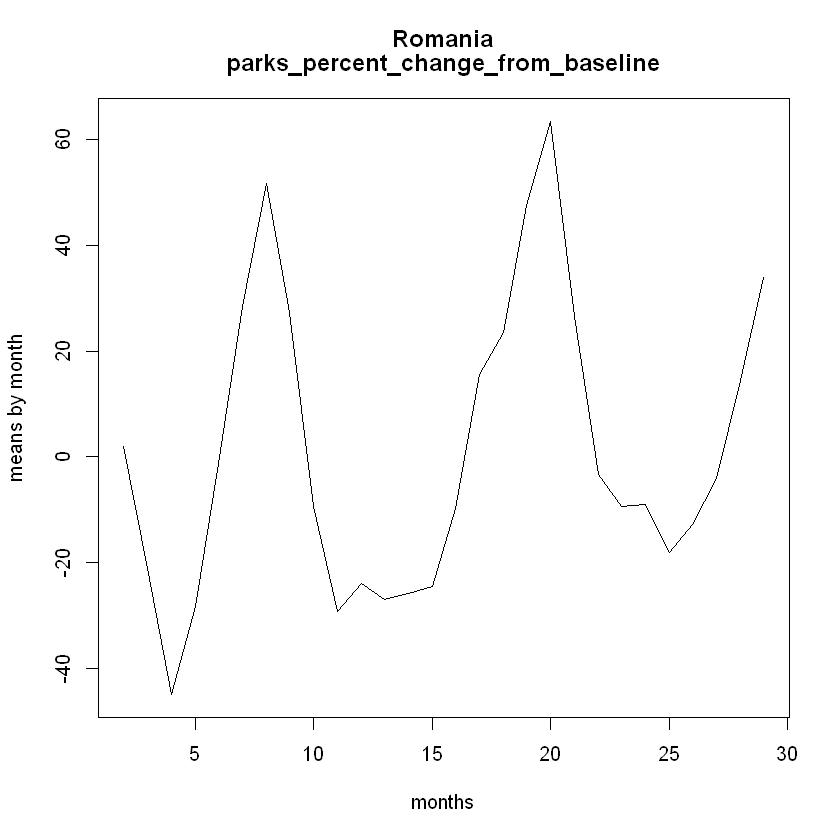

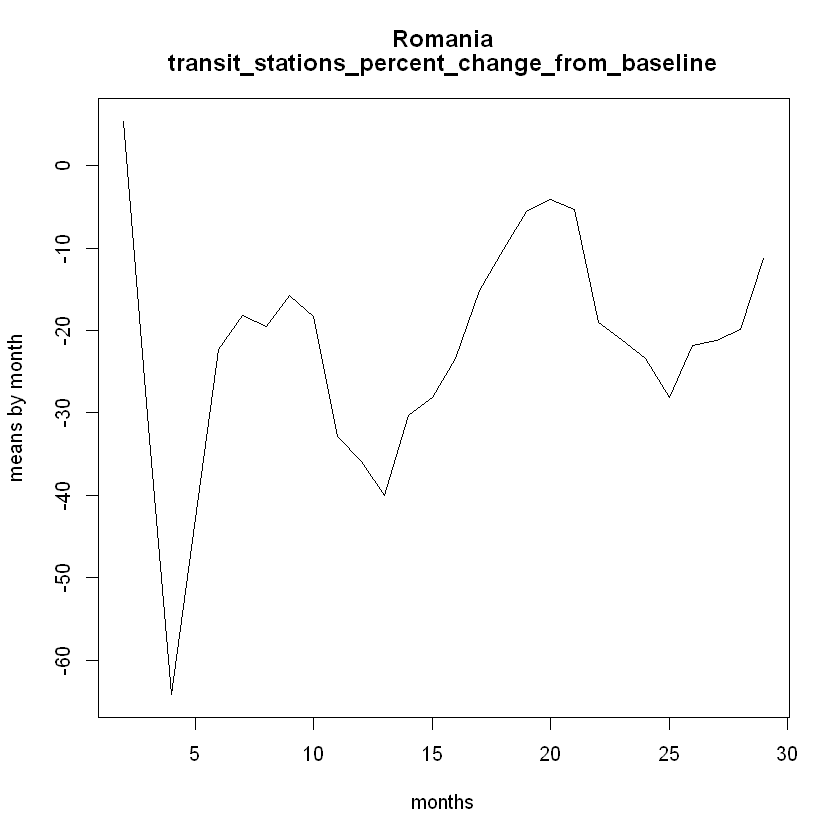

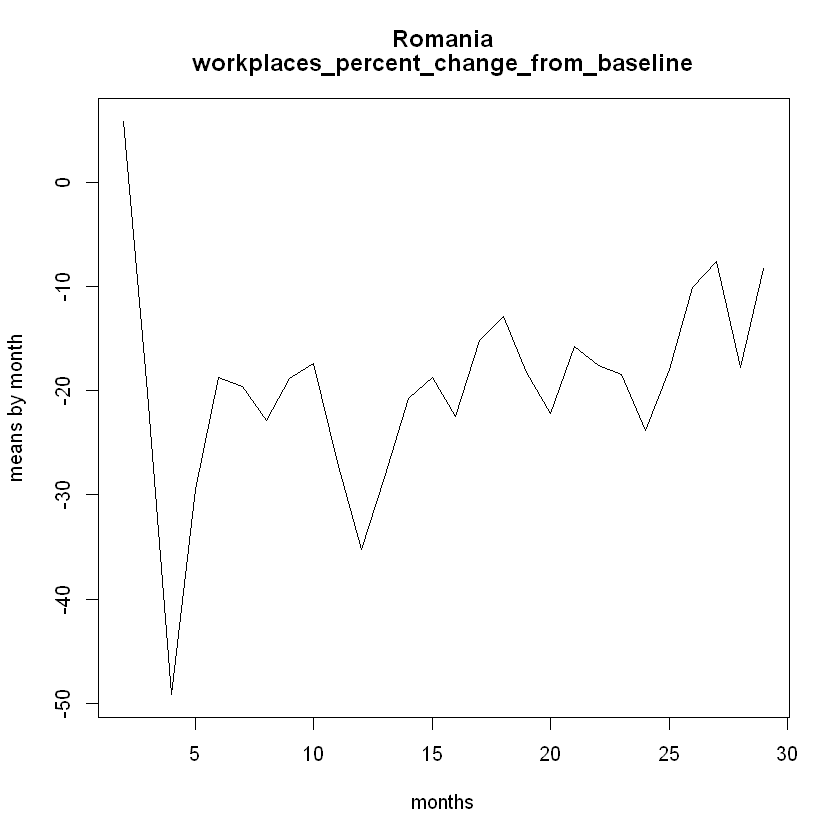

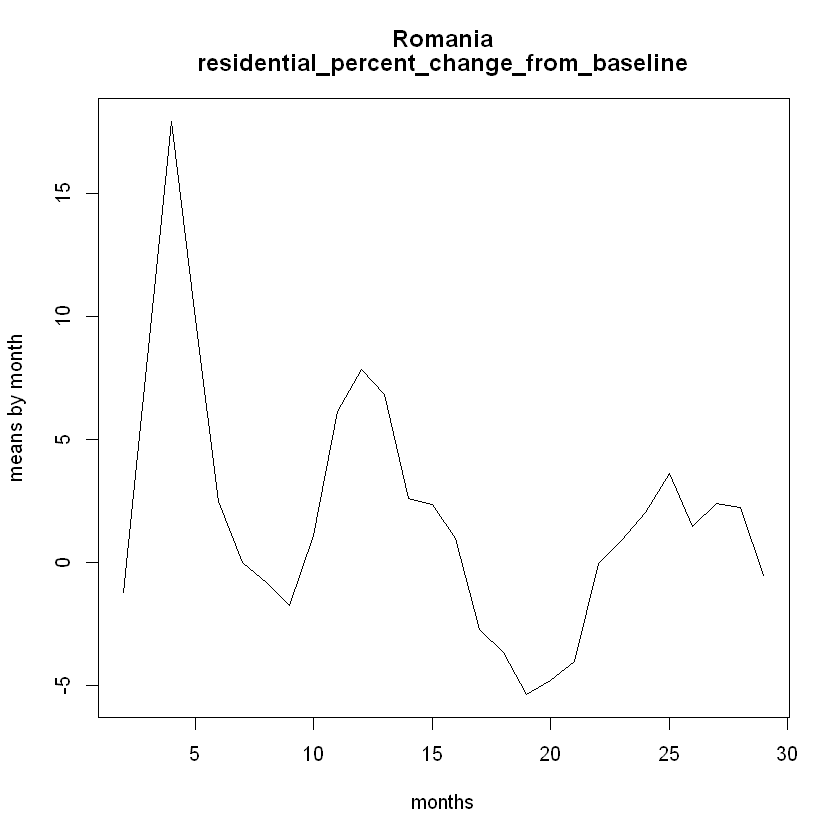

In [83]:
month.analysis('Romania')

There is an evident periodicity in the various periods of the year, but it can also be noted that in the first months of the restrictions due to COVID-19 the trend undergoes a significant decline (except of course for 'residential_percent_change_from_baseline' value)

### Exercise 2

In [6]:
mid.sq.genereator <- function(n){
    sq <- n*n
    sq_list <- unlist(strsplit(as.character(sq),""))

    l <- length(unlist(strsplit(as.character(n),""))) #n° of digits of non-squared one
    L <- length(sq_list) #n° of digits of squared one
    digits <- L-l #n° of digits to remove
    
    for (i in 1:digits){
        if (i%%2 == 1) {
            sq_list <- sq_list[-1]
        }
        if (i%%2 == 0) {
            sq_list <- sq_list[-length(sq_list)]
        }
    }
    new_number <- as.numeric(paste(sq_list, collapse=""))
    new_number
}

#!!inserire funzione per tot numeri random

In [7]:
mid.sq.genereator(1234)
mid.sq.genereator(101)
mid.sq.genereator(34345)

[1] 2275

[1] 20

[1] 95790

### Exercise 3

a) From the moment that the probability that a person has read the issue is constant is reasonable assume a binomial distribution as Likelihood with probability $p=29/150$ and $n=150$

$$P(y | p, n, M)={n\choose y} p^{y}(1-p)^{n-y} = 
\binom{150}{y} \left(\frac{29}{150}\right)^{y} \left(\frac{121}{150}\right)^{150-y} \quad \text { with } \quad y \leq n=150$$

b) Choosing a uniform prior our posterior $P(p | y, n, M)$ is proportional to the Likelihood we found in the first point:

$$P(p | y, n, M)=\frac{1}{Z} p^{y}(1-p)^{n-y}$$

where $Z$ is the normalization factor

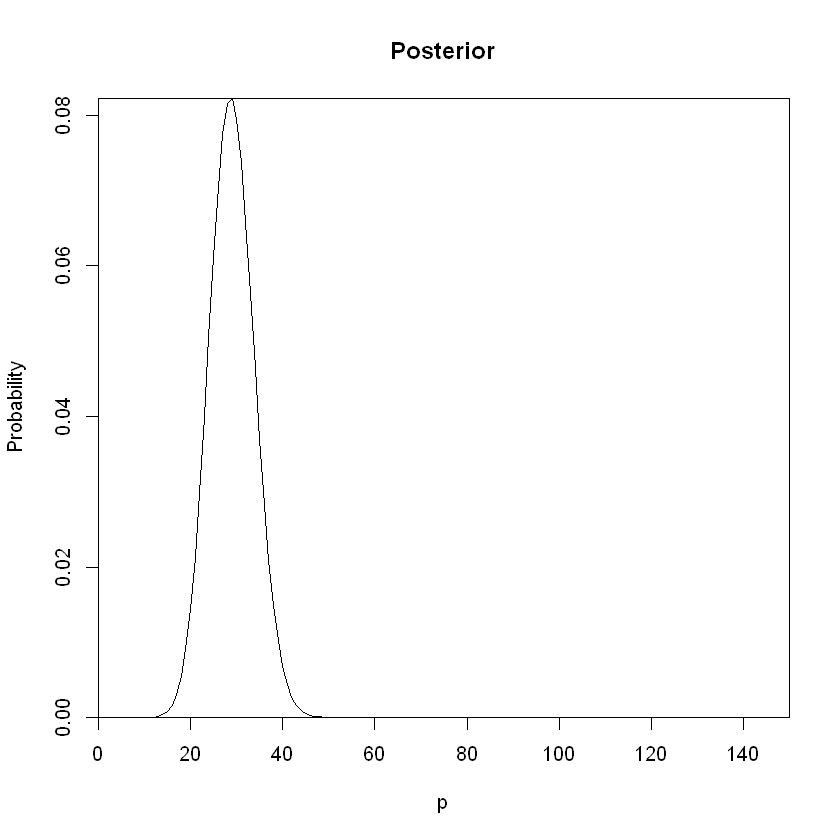

In [17]:
n <- 150
k <- 29
delta <- 1
x <- seq(0,150,by=delta)
p <- k/n


likelihood <- dbinom(x = x, size = n, prob = p)
posterior <- likelihood/(delta*sum(likelihood))

plot(x, likelihood, xaxs='i', yaxs='i', type='l',
     main="Posterior", xlab="p", ylab="Probability")


### Exercise 4
**a)**

In [101]:
exits.char <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 
                'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H')
# exits.char <- c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H', 'H', 
#                 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H')
n <- length(exits.char)
# changing T/H in 0/1
exits <- NULL
for (i in 1:n){
    if (exits.char[i]=='T') {value <- 0}
    else {value <- 1}
    exits <- append(exits, value)
}

H <- length(exits[exits==1])
cat(H, 'number of heads over', n, 'tosses')

15 number of heads over 30 tosses

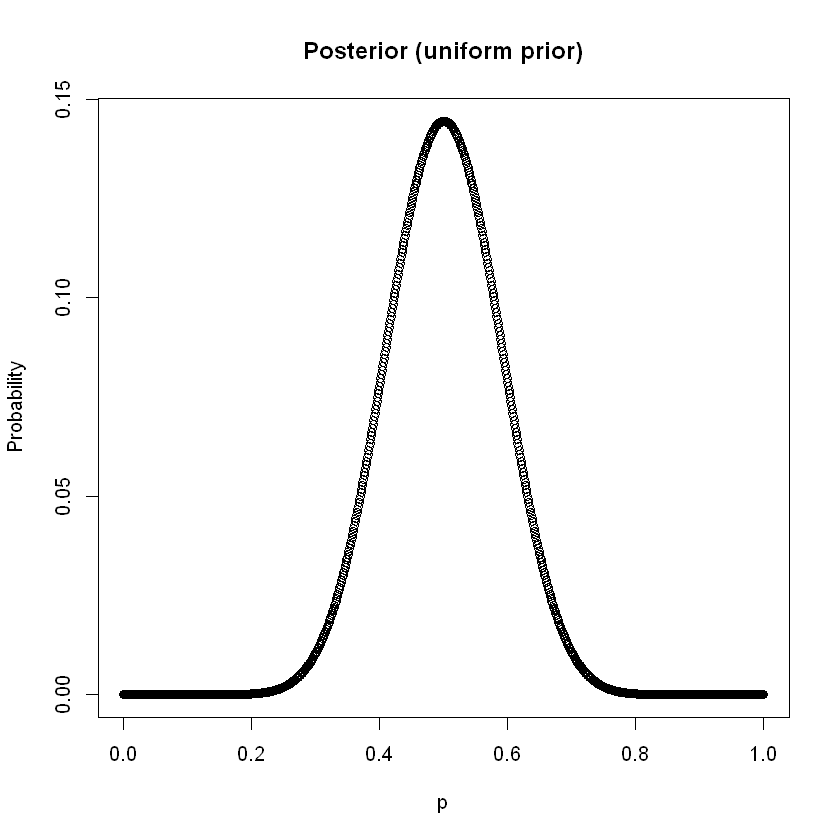

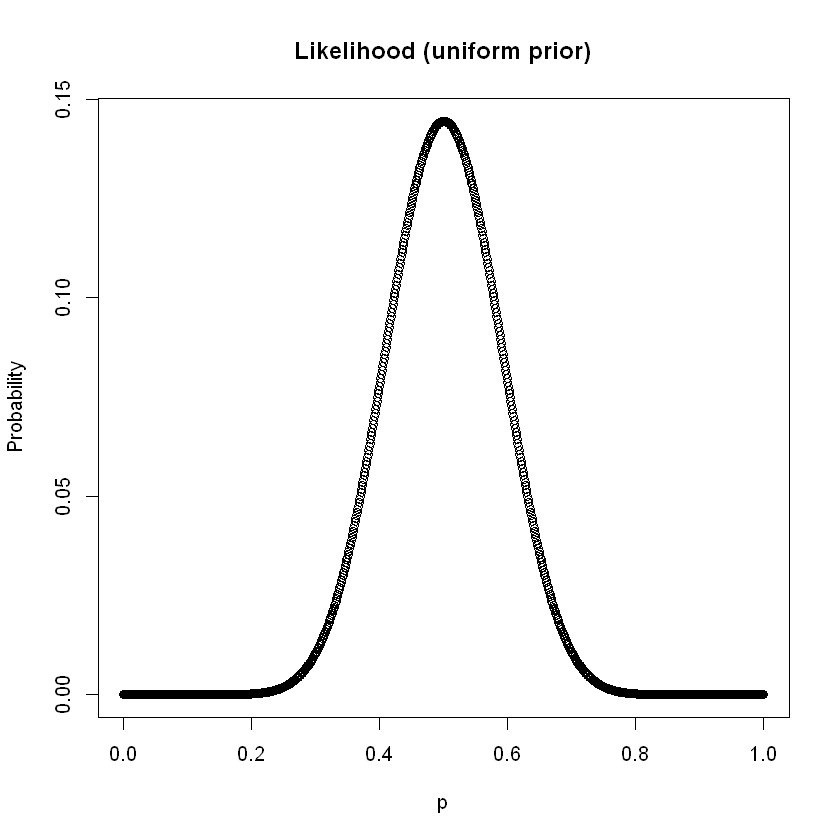

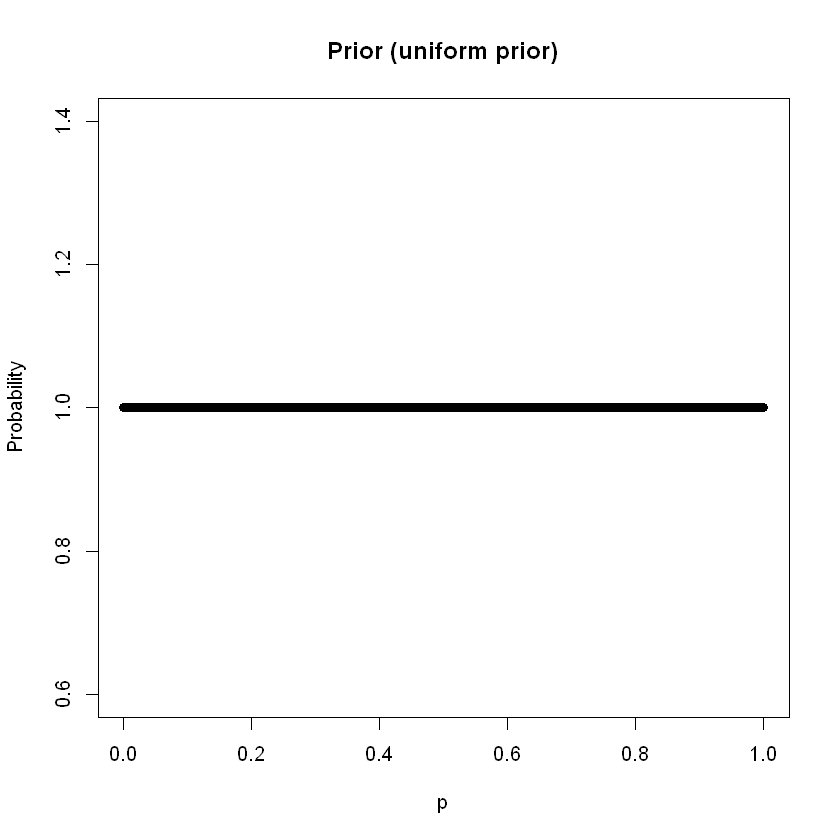

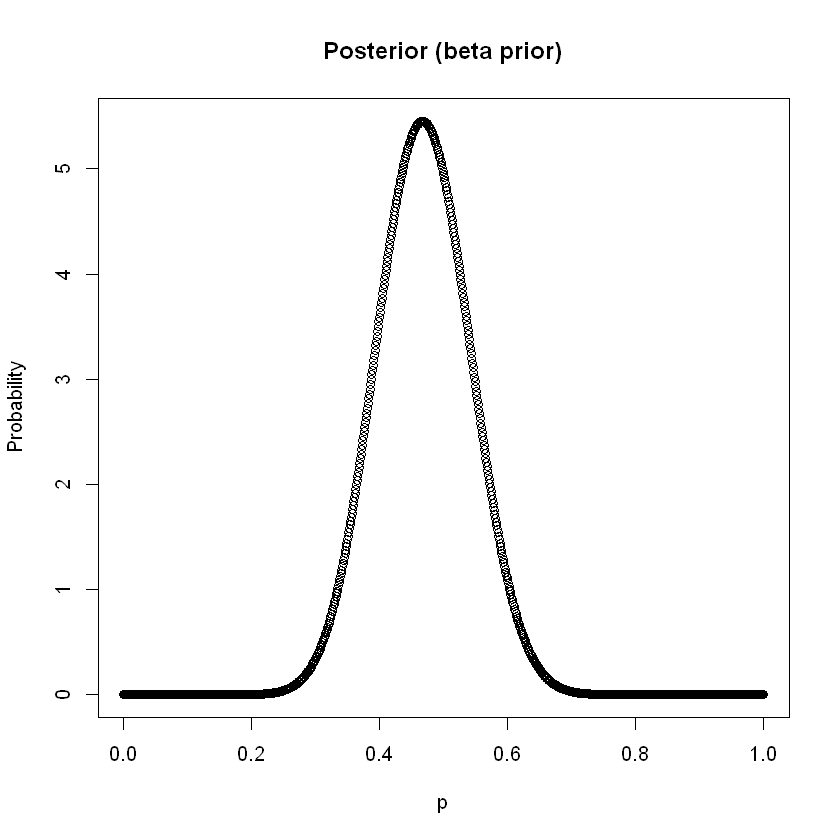

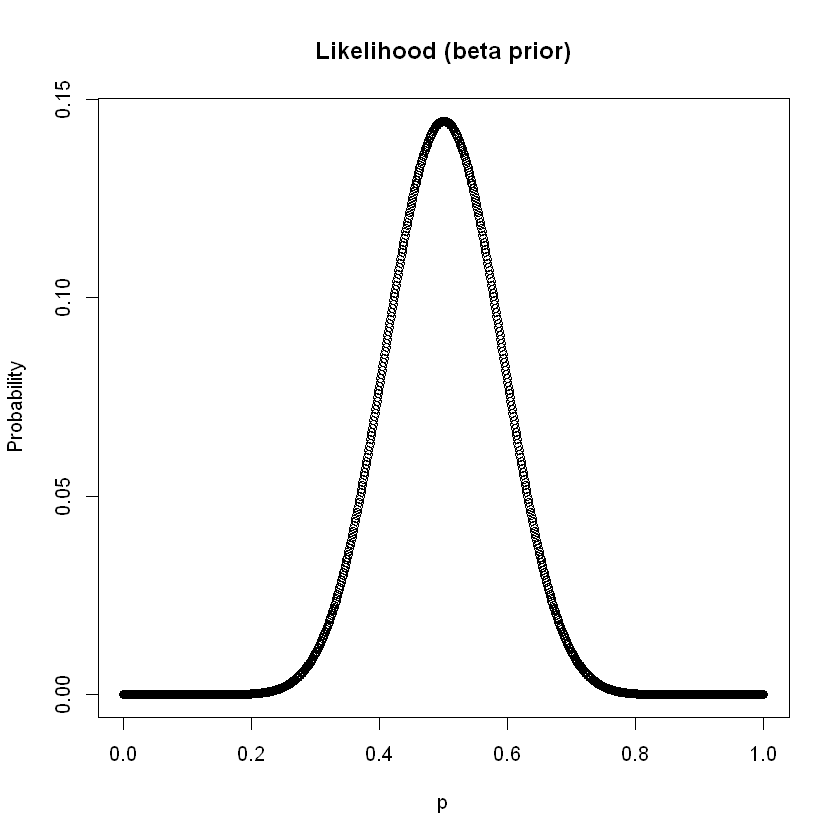

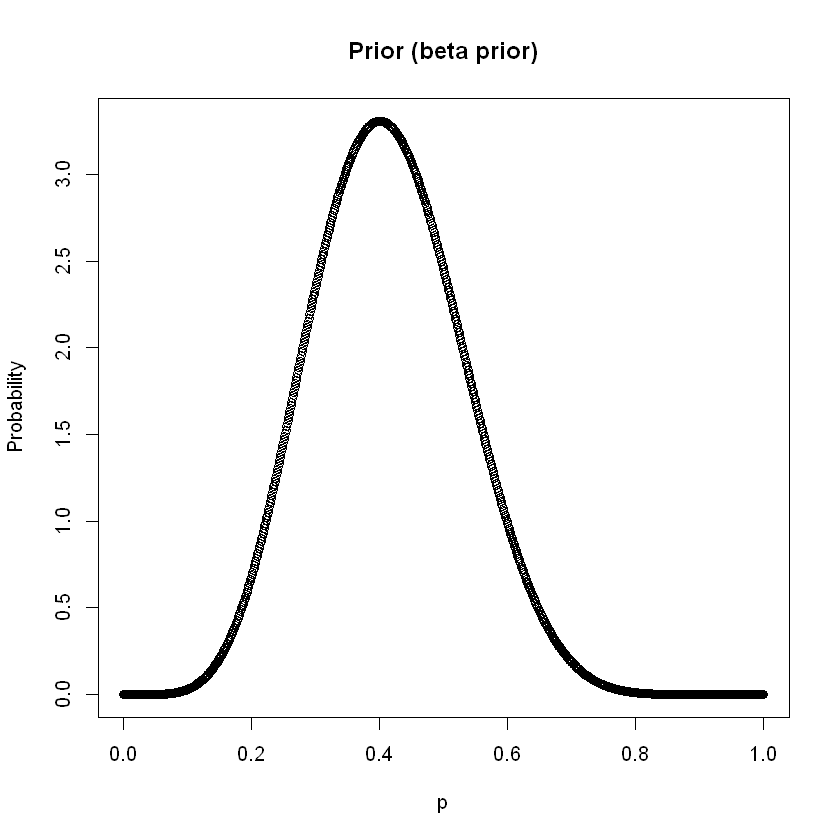

In [110]:
n.samples <- 1000
step <- 1/n.samples

p <- seq(0,1, length.out = 1/step)

# flat prior
likelihood.u <- dbinom(x = H, size = n, prob = p)
prior.u <- rep(1, n.samples)
posterior.u <- dbinom(x = H, size = n, prob = p)
mean.u <- H/n
# beta prior
a <- 7
b <- 10
a_ <- H + a
b_ <- n - H + b
likelihood.b <- likelihood.u
prior.b <- dbeta(x = p, shape1 = a, shape2 = b)
posterior.b <- dbeta(x = p, shape1 = a_, shape2 = b_)
mean.b <- a_/(a_+b_)

# plots
#   uniform
plot(p, posterior.u, main='Posterior (uniform prior)', ylab="Probability")
plot(p, likelihood.u, main='Likelihood (uniform prior)', ylab="Probability")
plot(p, prior.u, main='Prior (uniform prior)', ylab="Probability")
#   beta
plot(p, posterior.b, main='Posterior (beta prior)', ylab="Probability")
plot(p, likelihood.b, main='Likelihood (beta prior)', ylab="Probability")
plot(p, prior.b, main='Prior (beta prior)', ylab="Probability")

**b)**

In [115]:
cat('----uniform prior----')
mean.u <- H/n
low.u <- qbeta(0.0025, 1 + H, 1 + n - H)
up.u <- qbeta(0.975, 1 + H, 1 + n - H)
cat('\nMean: ', mean.u)
cat('\nConfidence Interval: ', low.u, ' - ', up.u)

cat('\n\n----beta prior----')
mean.b <- a_/(a_ + b_)
low.b <- qbeta(0.025, a_, b_)
up.b <- qbeta(0.975, a_, b_)
cat('\nMean: ', mean.b)
cat('\nConfidence Interval: ', low.b, ' - ', up.b)


----uniform prior----
Mean:  0.5
Confidence Interval:  0.2648298  -  0.669394

----beta prior----
Mean:  0.4680851
Confidence Interval:  0.3288787  -  0.6098663

**c)**

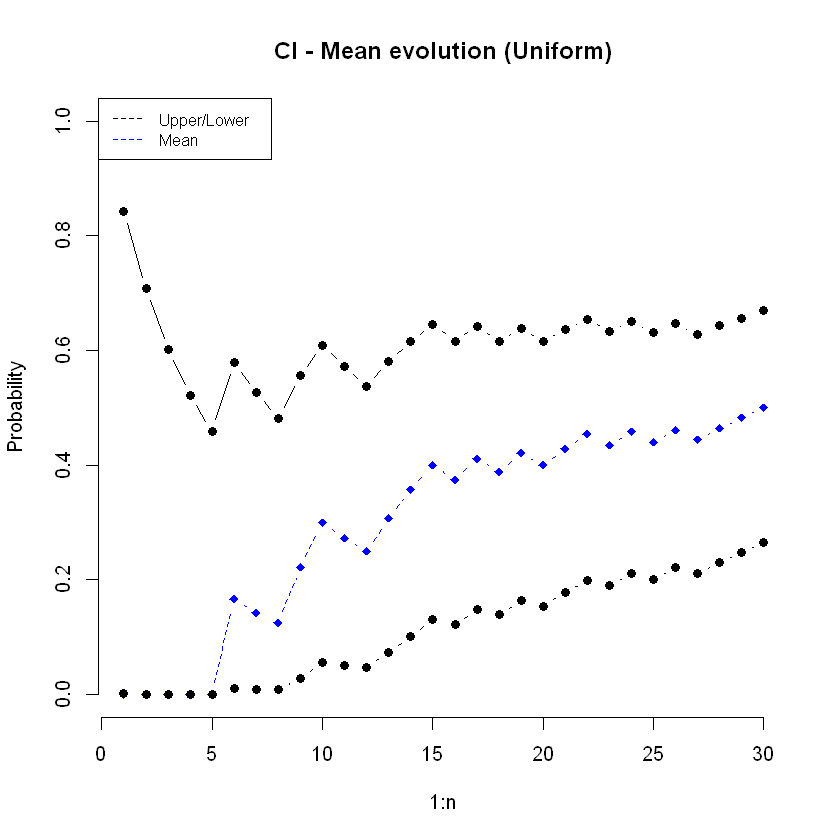

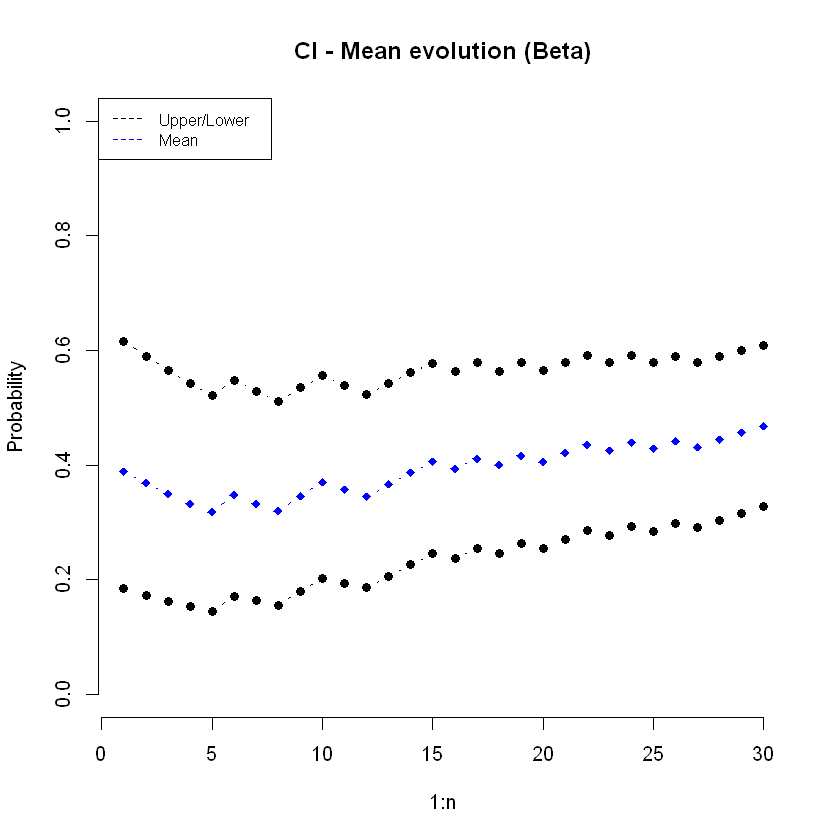

In [134]:
tosses <- NULL
mean.u.list <- NULL
mean.b.list <- NULL
low.u.list <- NULL
up.u.list <- NULL
low.b.list <- NULL
up.b.list <- NULL
for (e in exits){
    tosses <- append(tosses, e)
    H <- length(tosses[tosses==1])
    n <- length(tosses)
    # defining alpha and beta of the posterior
    a_ <- H + a
    b_ <- n - H + b
    # computnig means and CIs
    #--unif--
    mean.u.list <- append(mean.u.list, H/n)
    low.u.list <- append(low.u.list, qbeta(0.0025, 1 + H, 1 + n - H))
    up.u.list <- append(up.u.list, qbeta(0.975, 1 + H, 1 + n - H))
    #--beta--
    mean.b.list <- append(mean.b.list, a_/(a_ + b_))
    low.b.list <- append(low.b.list, qbeta(0.025, a_, b_))
    up.b.list <- append(up.b.list, qbeta(0.975, a_, b_))
}

# plots

plot(1:n, up.u.list, ylim = c(0,1), type = "b", pch = 19, frame = FALSE, 
     main='CI - Mean evolution (Uniform)', ylab="Probability")
lines(1:n, mean.u.list, pch = 18, col = "blue", type = "b", lty = 2)
lines(1:n, low.u.list, pch = 19, col = "black", type = "b", lty = 2)
legend("topleft", legend=c("Upper/Lower", "Mean"),
       col=c("black", "blue"), lty = c(2,2), cex=0.8)

plot(1:n, up.b.list, ylim = c(0,1), type = "b", pch = 19, frame = FALSE, 
     main='CI - Mean evolution (Beta)', ylab="Probability")
lines(1:n, mean.b.list, pch = 18, col = "blue", type = "b", lty = 2)
lines(1:n, low.b.list, pch = 19, col = "black", type = "b", lty = 2)
legend("topleft", legend=c("Upper/Lower", "Mean"),
       col=c("black", "blue"), lty = c(2,2), cex=0.8)